# Imports

In [62]:
import numpy as np

from genome import Genome
from player import Player
from population import Population
from game import Game

# Setup

In [63]:
history = []

# Genome Testing

## Genomes

Initializing genome1
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []




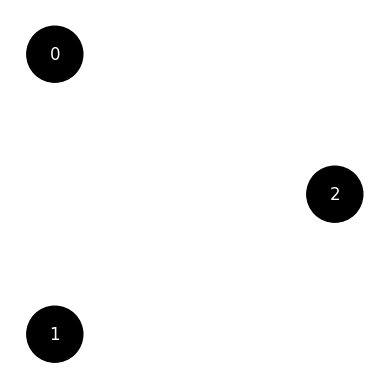

In [64]:
print("Initializing genome1")
genome1 = Genome(1, 1)
genome1.print_state()
genome1.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.2679,I=0,E=1)]
	History: [History(0->2,I=0,L=[])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=1),W=-0.2679,I=0,E=1)]




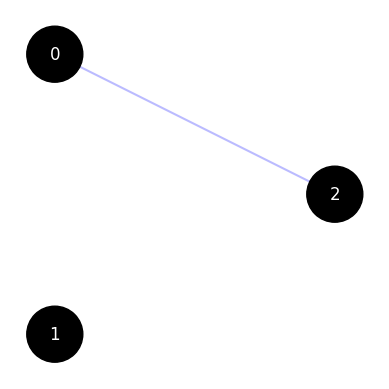

In [65]:
print("General mutation")
nodes, connections = genome1.mutate_genome(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Node mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.2679,I=0,E=1)]
	History: [History(0->2,I=0,L=[])]




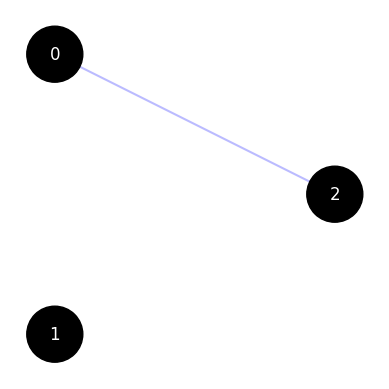

In [66]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Gene mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 2, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.2679,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=1),W=-0.5741,I=1,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=-0.5741,I=1,E=1)]




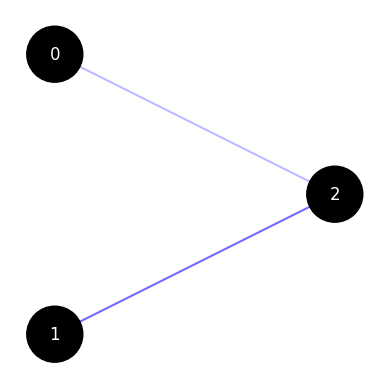

In [67]:
print("Gene mutation")
connection = genome1.mutate_connection(history)
genome1.print_state(history=history, connections=[connection])
genome1.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.2679,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5741,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5741,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




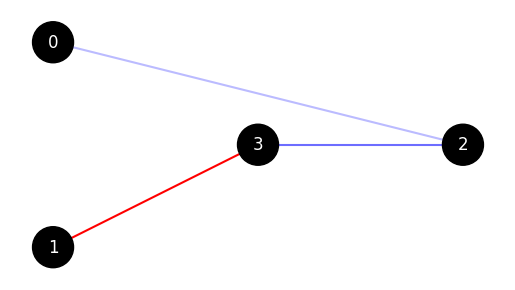

In [68]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Initializing genome2
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]




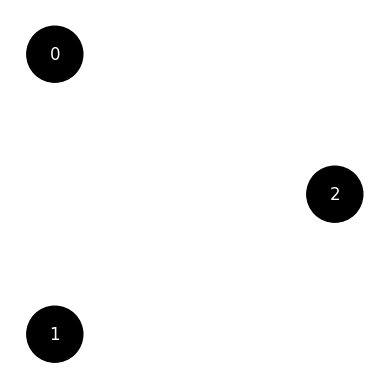

In [69]:
print("Initializing genome2")
genome2 = Genome(1, 1)
genome2.print_state(history=history)
genome2.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=0.5453,I=0,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=1),W=0.5453,I=0,E=1)]




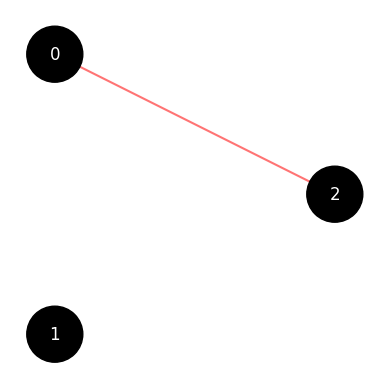

In [70]:
print("General mutation")
nodes, connections = genome2.mutate_genome(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Node mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=0.5453,I=0,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]




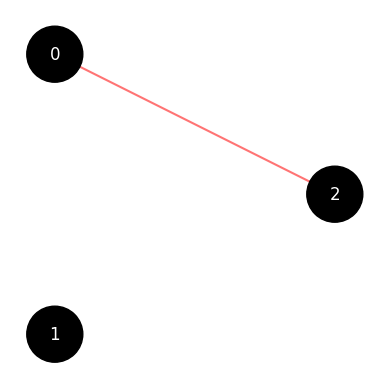

In [71]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 2, [Gene(Node(0,L=0)->Node(2,L=1),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=1),W=-0.8969,I=1,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=-0.8969,I=1,E=1)]




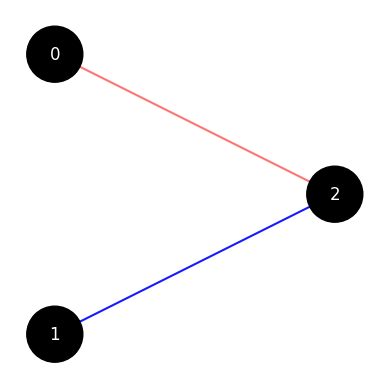

In [72]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




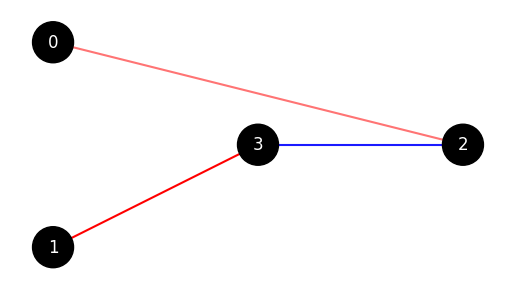

In [73]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [None]




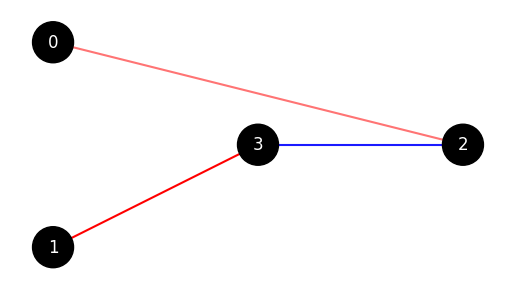

In [74]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 5 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1), Node(4,L=1)], 2: [Node(2,L=2)]}
	Connections: 8, [Gene(Node(0,L=0)->Node(2,L=2),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(2,L=2),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->2,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6])]

	Mutations
	Nodes: [Node(4,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(2,L=2),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]


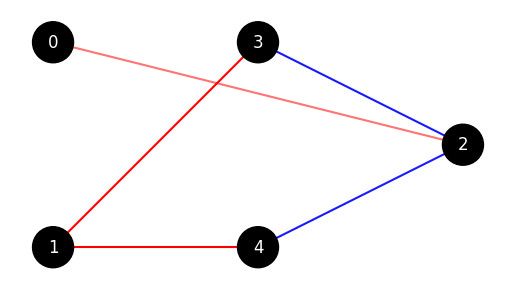

In [75]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 5 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1), Node(4,L=1)], 2: [Node(2,L=2)]}
	Connections: 8, [Gene(Node(0,L=0)->Node(2,L=2),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(2,L=2),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->2,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6])]

	Mutations
	Connections: [None]




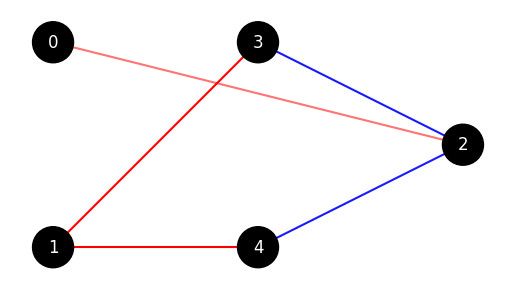

In [76]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->2,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(1->5,I=8,L=[0, 1, 2, 3

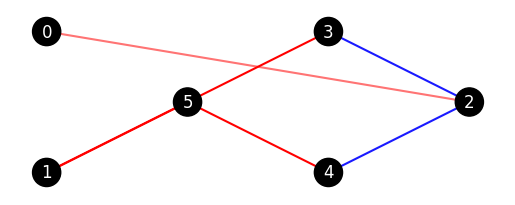

In [77]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

## Crossover

genome1
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.2679,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5741,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




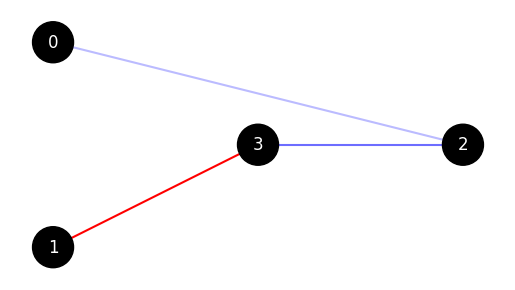

In [78]:
print("genome1")
genome1.print_state()
genome1.draw_state()

genome2
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]




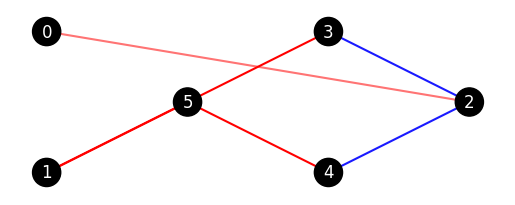

In [79]:
print("genome2")
genome2.print_state()
genome2.draw_state()

Crossover genome1 with genome 2 to create genome3
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




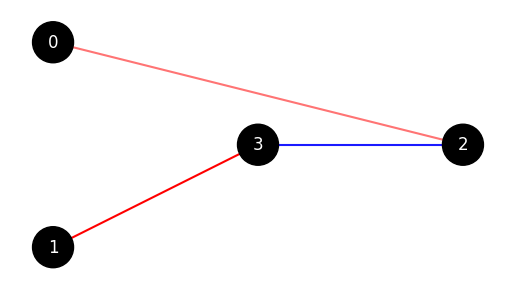

In [80]:
print("Crossover genome1 with genome 2 to create genome3")
genome3 = genome1.crossover(genome2)
genome3.print_state()
genome3.draw_state()

Crossover genome2 with genome 1 to create genome4
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=1), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]




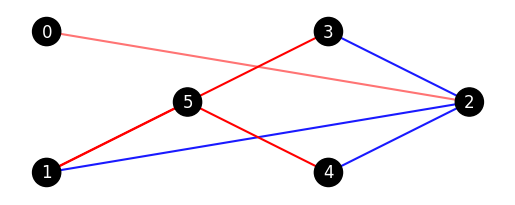

In [81]:
print("Crossover genome2 with genome 1 to create genome4")
genome4 = genome2.crossover(genome1)
genome4.print_state()
genome4.draw_state()

## Cloning

Clone genome1 to create genome5
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.2679,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5741,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




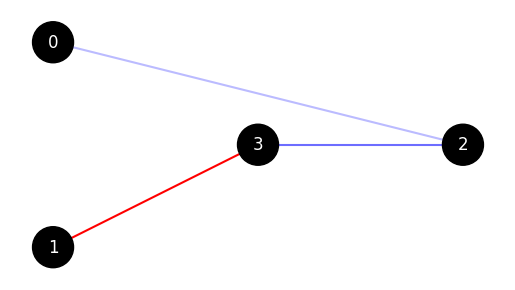

In [82]:
print("Clone genome1 to create genome5")
genome5 = genome1.clone()
genome5.print_state()
genome5.draw_state()

Clone genome2 to create genome6
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]




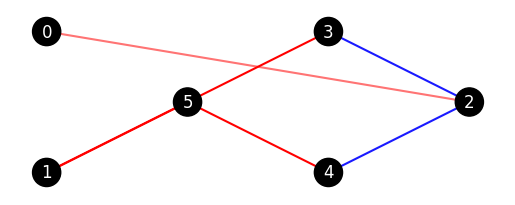

In [83]:
print("Clone genome2 to create genome6")
genome6 = genome2.clone()
genome6.print_state()
genome6.draw_state()

## Propagation

genome1
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.2679,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5741,I=3,E=1)]


[0.36472259427354614]


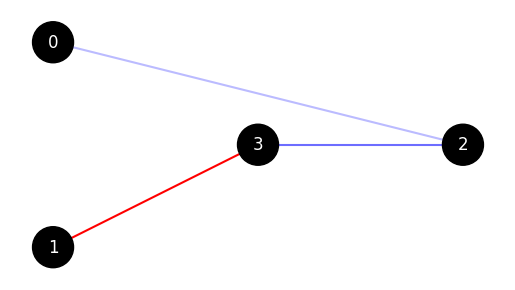

In [84]:
print("genome1")
out1 = genome1.forward_pass([1, 0.5])
genome1.print_state()
genome1.draw_state()
print(out1)

genome2
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]


[0.41300799046863873]


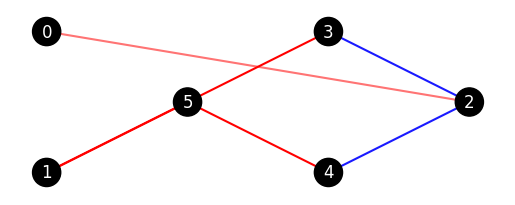

In [85]:
print("genome2")
genome2.print_state()
genome2.draw_state()
out2 = genome2.forward_pass([1, 0.5])
print(out2)

genome3
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]


[0.5242033652458821]


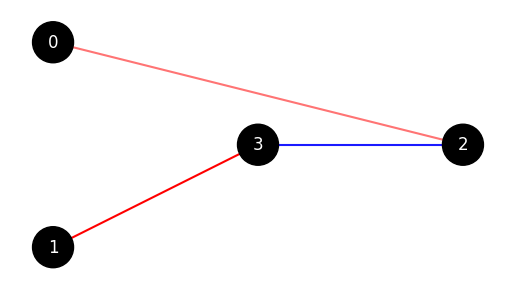

In [86]:
print("genome3")
genome3.print_state()
genome3.draw_state()
out3 = genome3.forward_pass([1, 0.5])
print(out3)

genome4
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=1), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]


[0.3100302847984659]


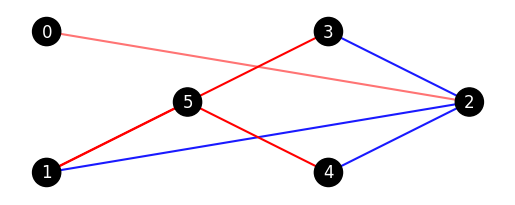

In [87]:
print("genome4")
genome4.print_state()
genome4.draw_state()
out4 = genome4.forward_pass([1, 0.5])
print(out4)

genome5
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.2679,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5741,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5741,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]


[0.36472259427354614]


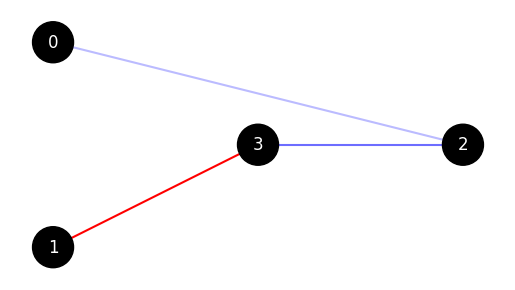

In [88]:
print("genome5")
genome5.print_state()
genome5.draw_state()
out5 = genome5.forward_pass([1, 0.5])
print(out5)

genome6
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 11, [Gene(Node(0,L=0)->Node(2,L=3),W=0.5453,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.8969,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.8969,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=1.0000,I=5,E=0), Gene(Node(4,L=2)->Node(2,L=3),W=-0.8969,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=7,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=1.0000,I=9,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=10,E=1)]


[0.41300799046863873]


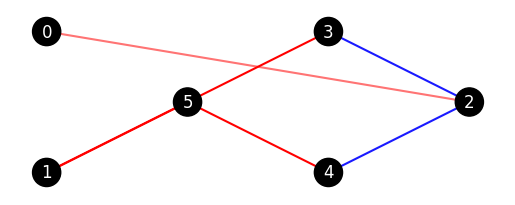

In [89]:
print("genome6")
genome6.print_state()
genome6.draw_state()
out6 = genome6.forward_pass([1, 0.5])
print(out6)

# Player Testing

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 0, []




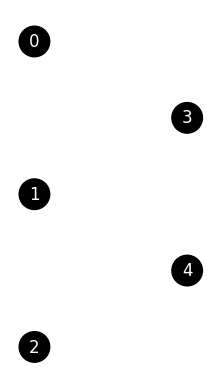

In [90]:
history = []

player = Player(2, 2)
player.nn.print_state()
player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.3245,I=0,E=1)]




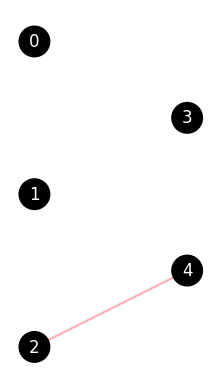

In [91]:
player.mutate(history)
player.nn.print_state()
player.nn.draw_state()

In [92]:
inputs = [1] + np.random.randint(2, size=2).tolist()
decision = player.decide(inputs)
print(inputs, player.nn.forward_pass(inputs), decision)

[1, 0, 1] [0.5, 0.5804198882221474] 1


# Population Testing

In [93]:
population = Population(1000, 2, 2)
players = population.new_generation()
game = Game(players)
won = game.play_game()
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()
print("Innovation History: %s" % population.innovation_history)
print("Number of Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness))

Innovation History: [History(2->4,I=0,L=[]), History(0->4,I=1,L=[]), History(0->3,I=2,L=[]), History(1->3,I=3,L=[]), History(1->4,I=4,L=[]), History(2->3,I=5,L=[]), History(2->5,I=6,L=[0]), History(5->4,I=7,L=[0, 6]), History(0->5,I=8,L=[0, 6, 7]), History(1->5,I=9,L=[4]), History(5->4,I=10,L=[4, 9]), History(0->5,I=11,L=[4, 9, 10]), History(1->5,I=12,L=[3]), History(5->3,I=13,L=[3, 12]), History(0->5,I=14,L=[3, 12, 13])]
Number of Species: 9
Species 0 - Players: 89, Average Fitness: 6.3708
Species 1 - Players: 76, Average Fitness: 6.3026
Species 2 - Players: 92, Average Fitness: 6.2609
Species 3 - Players: 83, Average Fitness: 6.2892
Species 4 - Players: 76, Average Fitness: 6.4211
Species 5 - Players: 86, Average Fitness: 6.3023
Species 6 - Players: 2, Average Fitness: 6.0000
Species 7 - Players: 1, Average Fitness: 5.0000
Species 8 - Players: 1, Average Fitness: 2.0000


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.4548,I=0,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.2731,I=0,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.6057,I=0,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.8351,I=0,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.7040,I=0,E=1)]




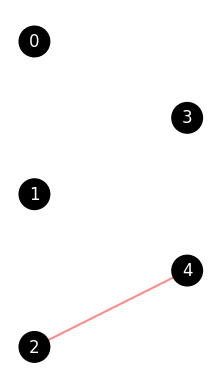

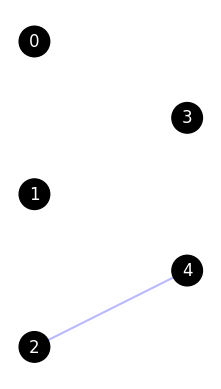

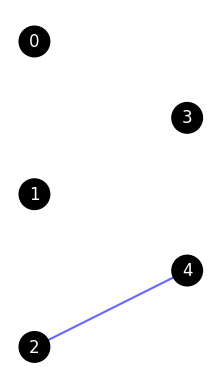

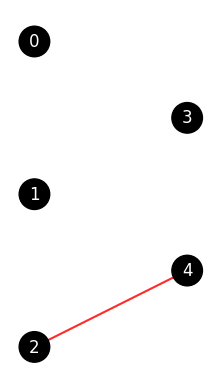

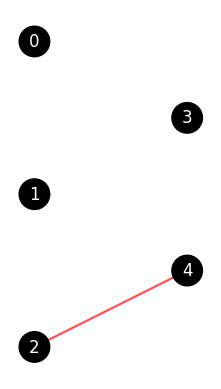

In [94]:
species = population.species[0]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.4548,I=0,E=1)]


[1, 0, 0] [0.5, 0.5] 0 1
[1, 0, 1] [0.5, 0.6117887019640302] 1 2
[1, 0, 1] [0.5, 0.6117887019640302] 1 3
[1, 0, 1] [0.5, 0.6117887019640302] 1 4
[1, 0, 1] [0.5, 0.6117887019640302] 1 5
[1, 0, 0] [0.5, 0.5] 0 6
[1, 0, 0] [0.5, 0.5] 0 7
[1, 1, 1] [0.5, 0.6117887019640302] 1 7
[1, 1, 1] [0.5, 0.6117887019640302] 1 7
[1, 1, 1] [0.5, 0.6117887019640302] 1 7


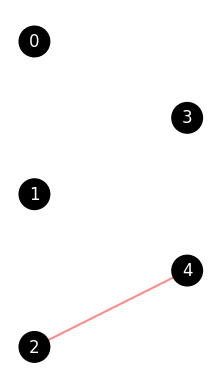

In [95]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(2,L=0)->Node(4,L=2),W=-0.0935,I=0,E=0), Gene(Node(2,L=0)->Node(5,L=1),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=-0.0935,I=7,E=1)]




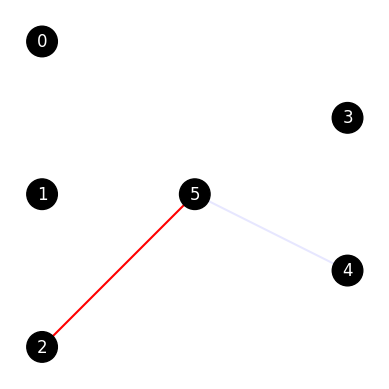

In [96]:
species = population.species[np.argmin([len(s.players) for s in population.species])]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(2,L=0)->Node(4,L=2),W=-0.0935,I=0,E=0), Gene(Node(2,L=0)->Node(5,L=1),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=8,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=-0.0935,I=7,E=1)]


[1, 0, 1] [0.5, 0.4766448324715982] 0 0
[1, 0, 1] [0.5, 0.4766448324715982] 0 0
[1, 0, 0] [0.5, 0.5] 0 1
[1, 0, 1] [0.5, 0.4766448324715982] 0 1
[1, 1, 0] [0.5, 0.5] 0 1
[1, 0, 0] [0.5, 0.5] 0 2
[1, 1, 0] [0.5, 0.5] 0 2
[1, 1, 1] [0.5, 0.4766448324715982] 0 3
[1, 1, 1] [0.5, 0.4766448324715982] 0 4
[1, 1, 1] [0.5, 0.4766448324715982] 0 5


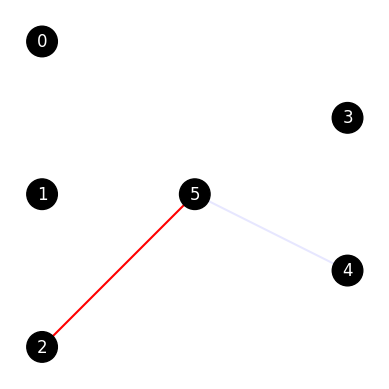

In [97]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

# Training Test

In [98]:
population = Population(1000, 2, 2)
players = population.new_generation()
game = Game(players)
won = game.play_game()
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
print("Players: %d" % population.culled_population_size)
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 15
Species: 9
Players: 507
Species 0 - Players: 90, Average Fitness: 6.0333, Max Fitness: 10.0000
Species 1 - Players: 86, Average Fitness: 6.1977, Max Fitness: 10.0000
Species 2 - Players: 88, Average Fitness: 6.1250, Max Fitness: 9.0000
Species 3 - Players: 82, Average Fitness: 6.1341, Max Fitness: 9.0000
Species 4 - Players: 78, Average Fitness: 6.1410, Max Fitness: 9.0000
Species 5 - Players: 79, Average Fitness: 6.1772, Max Fitness: 9.0000
Species 6 - Players: 2, Average Fitness: 6.5000, Max Fitness: 9.0000
Species 7 - Players: 1, Average Fitness: 8.0000, Max Fitness: 8.0000
Species 8 - Players: 1, Average Fitness: 6.0000, Max Fitness: 6.0000


In [99]:
players = population.new_generation()
print(len(players))
print(len(population.species))

game = Game(players)
won = game.play_game()
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovation History: %s" % population.innovation_history)
print("Number of Species: %d" % len(population.species))
print("Number of Players: %d" % population.culled_population_size)
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

1000
9
Innovation History: [History(2->3,I=0,L=[]), History(2->4,I=1,L=[]), History(1->4,I=2,L=[]), History(1->3,I=3,L=[]), History(0->3,I=4,L=[]), History(0->4,I=5,L=[]), History(1->5,I=6,L=[3]), History(5->3,I=7,L=[3, 6]), History(0->5,I=8,L=[3, 6, 7]), History(2->5,I=9,L=[1]), History(5->4,I=10,L=[1, 9]), History(0->5,I=11,L=[1, 9, 10]), History(2->5,I=12,L=[0]), History(5->3,I=13,L=[0, 12]), History(0->5,I=14,L=[0, 12, 13]), History(1->4,I=15,L=[3]), History(2->4,I=16,L=[3]), History(0->3,I=17,L=[3]), History(2->3,I=18,L=[3]), History(0->4,I=19,L=[4]), History(2->3,I=20,L=[4]), History(2->4,I=21,L=[4]), History(1->4,I=22,L=[4]), History(2->4,I=23,L=[0]), History(1->3,I=24,L=[0]), History(0->4,I=25,L=[0]), History(1->4,I=26,L=[1]), History(1->3,I=27,L=[1]), History(0->4,I=28,L=[1]), History(0->3,I=29,L=[2]), History(2->4,I=30,L=[2]), History(2->3,I=31,L=[2]), History(0->4,I=32,L=[2]), History(2->4,I=33,L=[5]), History(2->5,I=34,L=[3, 6, 8, 7]), History(0->4,I=35,L=[3, 6, 8, 7]), His